# Ex 1.10

In the radial system represented by the circuit below, $X=1.5~\Omega$. Consider the source voltage to be constant at $\overline{V}_S=100$ V$\angle 0$. Calculate and plot $V_S/V_R$ if the load varies in a range from 0 to 1 kW at the following three power factors: unity, 0.9 (lagging), 0.9 (leading).

[//]: # (<img src="TP1EX16.png" alt="drawing" width="400"/>)
<img src="figs/simple-PF.png" alt="drawing" width="600"/>

#### Import libraries

In [77]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

#### Data

In [78]:
X = 1.5 # [ohm]
Vs = cmath.rect(100, 0)
P_range = np.linspace(0, 1000, 101) # [W]
phi_range = [-np.arccos(0.9), 0, np.arccos(0.9)]

If $\overline{I}$ is lagging, $Q>0$ (inductive system) => $\sin(\phi)>0$ => $\phi>0$

If $\overline{I}$ is leading, $Q<0$ (capacitive system) => $\sin(\phi)<0$ => $\phi<0$

## Compute Vr and delta

We want to compute the magnitude and phase of $\overline{V}_r$. To do that, we use the following formula:

<img src="formulas.png" alt="formulas" width="600"/>


Pay attention that delta in this formula is the angle when the phase of $\overline{V}_r$ is the reference. But here we selected the phase of $\overline{V}_s$ as the reference, so we will have to adapt the formula, by changing the sign of $P$.


We identify in this formula the real and imaginary parts of $\overline{V}_r$:

$a=V_s\cos\delta$

$b=V_r\sin\delta$

We have directly 

$b= \frac{-PX}{V_s}$

To compute $a$, we use the fact that $\cos^2\delta+\sin^2\delta = 1$ to write

$XQ = V_sV_r \cos\delta-V_r^2 \Leftrightarrow a^2 - V_s a + XQ +b^2 = 0$


In [79]:
def compute_Vr(P, phi):
    
    b = -P*X/abs(Vs)
    
    Q = P/np.cos(phi)*np.sin(phi)
    
    discriminant = abs(Vs)**2-4*(X*Q+b**2)
    
    a = (abs(Vs) + np.sqrt(discriminant))/2
    #a2 = (abs(Vs) - np.sqrt(discriminant))/2
    
    return a, b, Q
    

## Plot the results

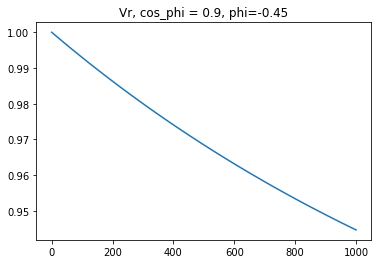

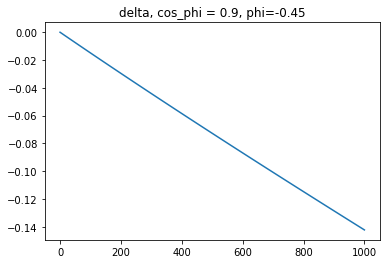

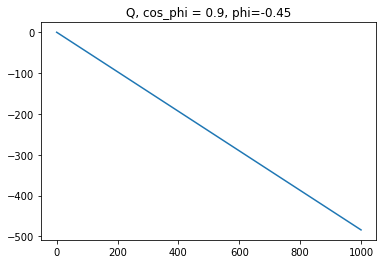

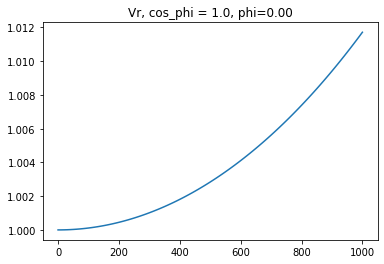

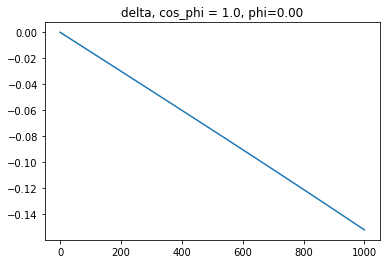

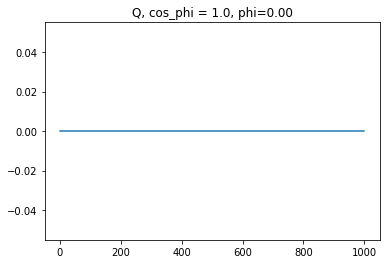

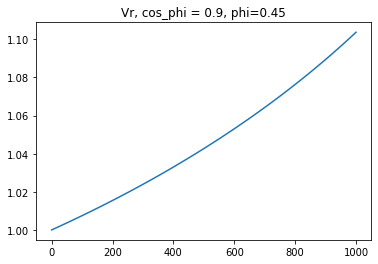

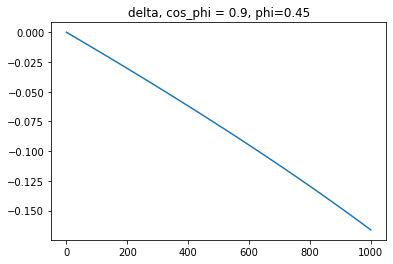

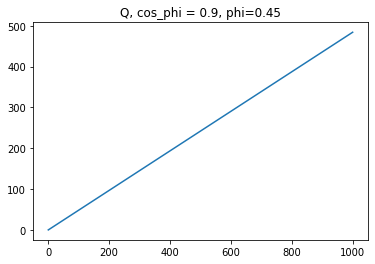

In [80]:
# Initialize Vr and delta

for phi in phi_range:
    Vr_mag = []
    delta = []
    Q = []
    
    for P in P_range:
        a, b, q = compute_Vr(P, phi)
        Vr = complex(a, b)
        Vr_mag.append(abs(Vr))
        delta.append(np.angle(Vr))
        Q.append(q)
        
    
    plt.figure()
    plt.title("Vr, cos_phi = {}, phi={:.2f}".format(np.cos(phi), phi))
    Vr_normalized = [abs(Vs)/x for x in Vr_mag]
    plt.plot(P_range, Vr_normalized)
    plt.show()
    
    plt.figure()
    plt.title("delta, cos_phi = {}, phi={:.2f}".format(np.cos(phi), phi))
    plt.plot(P_range, delta)
    plt.show()
    
    plt.figure()
    plt.title("Q, cos_phi = {}, phi={:.2f}".format(np.cos(phi), phi))
    plt.plot(P_range, Q)
    plt.show()
    